#Things to do

add drop out to the cnn layers - reduce the chances of overfiting
data augmentation - more data
https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f


# Importing library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import os
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Softmax

# All important file location

In [3]:
main_path = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\'

train_data_path = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\train_STEGGED_DATASET.pickle' #80%
test_data_path = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\test_STEGGED_DATASET.pickle' #10%
valid_data_path = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\valid_STEGGED_DATASET.pickle' #10%

# paths for models and theri history

cnn_model_epoch_55 = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\cnnModelEpoch55.h5'
cnn_model_epoch_55_histroy = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\cnnModelEpoch55_HISTORY.pickle'

cnn_model_epoch_25_layer_3 = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\model\\cnnModelEpoch25_layers_3.h5'
cnn_model_epoch_25_layer_3_history = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\cnnModelEpoch25_HISTORY_layers_3.pickle'

cnn_model_epoch_25 = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\cnnModelEpoch25.h5'
cnn_model_epoch_25_history = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\cnnModelEpoch25_HISTORY.pickle'

cnn_model_softmax = main_path+'model\\cnn_model_softmax.h5'
cnn_model_softmax_history = main_path+'model\\cnn_model_softmaxHISTORY.pickle'

print(os.path.exists(cnn_model_softmax_history))

True


# Function to read and write data in pickle formate

In [8]:
def readPickledata(filelocation):
    pickel_read = open(filelocation,'rb')
    data = pickle.load(pickel_read)
    pickel_read.close()
    return data


def writePickledata(filelocation,data):
    pickel_write = open(filelocation,'wb')
    pickle.dump(data,pickel_write)
    pickel_write.close()
    print('file writing done')


def load_save_models(modelLocation):
    return load_model(modelLocation)


def draw_Training_validation_loss(history,title):
    #Training and validation Loss
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1,len(loss)+1)
    plt.plot(epochs,loss,'yo',label='Training Loss')
    plt.plot(epochs,val_loss,'r',label='Validation Loss')
    plt.legend("TVloss")
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

def draw_Trainingvalidation_acc(history,title):
    #Training and validation accuracy
    accuracy = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1,len(accuracy)+1)
    plt.plot(epochs,accuracy,'yo',label='Training acc')
    plt.plot(epochs,val_acc,'r',label='Validation acc')
    plt.legend("TVacc")
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    

# Loading Dataset

In [9]:
train_data = readPickledata(filelocation=train_data_path)
print(len(train_data))

test_data = readPickledata(filelocation=test_data_path)
print(len(test_data))


valid_data = readPickledata(filelocation=valid_data_path)
print(len(valid_data))


936
117
117


# Train Data

In [11]:
X_train_data = [] # color values of the train data
Y_train_data = [] # label values of the train data

for feature, label in train_data:
    X_train_data.append(feature)
    Y_train_data.append(label)

X_train_data = np.array(X_train_data)
Y_train_data = np.array(Y_train_data)

X_train_data = X_train_data/255
Y_train_data = Y_train_data.reshape(len(Y_train_data), 1)
print(X_train_data.shape)

print(Y_train_data.shape)



(936, 1000, 1000, 3)
(936, 1)


# Test Data

In [12]:
X_test_data = [] # color values of the test data
Y_test_data = [] # label values of the test data

for feature, label in test_data:
    X_test_data.append(feature)
    Y_test_data.append(label)

X_test_data = np.array(X_test_data)
Y_test_data = np.array(Y_test_data)
X_test_data = X_test_data/255
Y_test_data = Y_test_data.reshape(len(Y_test_data), 1)
print(X_test_data.shape)



(117, 1000, 1000, 3)


# Valid Data

In [11]:
X_valid_data = [] # color values of the valid data
Y_valid_data = [] # label values of the valid data

for feature, label in valid_data:
    X_valid_data.append(feature)
    Y_valid_data.append(label)

X_valid_data = np.array(X_valid_data)
Y_valid_data = np.array(Y_test_data)
X_valid_data = X_valid_data/255
Y_valid_data = Y_valid_data.reshape(len(Y_valid_data), 1)
print(X_valid_data.shape)


(117, 1000, 1000, 3)


# Testing values

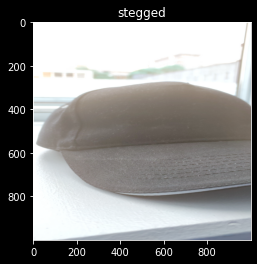

In [10]:
random_image_value = random.randint(0,len(X_valid_data))
plt.imshow(X_train_data[random_image_value,:])
if Y_valid_data[random_image_value,:] == 0:
    plt.title("Normal")
else:
    plt.title("stegged")
plt.show()

# CNN model creation

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(1000, 1000,3)),
    MaxPool2D((2,2)),

    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D((2,2)),

    Conv2D(32,(3,3), activation='relu'),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(2,activation='softmax')
])

In [ ]:
print(model.summary())

In [ ]:
model.compile(loss = 'SparseCategoricalCrossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

In [ ]:
history = model.fit(X_train_data,Y_train_data, epochs=25, batch_size=50,validation_data=(X_valid_data,Y_valid_data))
 

In [ ]:
print(history.history)

# save the model and history of the complied cnn model

In [ ]:

customemodelname= 'cnn_model_softmax' #change this name when applicable

save_model_location = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\'+customemodelname+'.h5'
model.save(save_model_location)

save_history_location = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\'+customemodelname+'HISTORY.pickle'
history_location_file = open(save_history_location,'wb')
pickle.dump(history.history,history_location_file)
history_location_file.close()
print('done')

# load the model and history of the complied cnn model

In [15]:
#loading models

model_ep_55 = load_save_models(modelLocation=cnn_model_epoch_55)
history_ep_55 = readPickledata(filelocation=cnn_model_epoch_55_histroy)


model_ep_25_layer_3 = load_save_models(modelLocation=cnn_model_epoch_25_layer_3)
history_ep_25_layer_3 = readPickledata(filelocation=cnn_model_epoch_25_layer_3_history)


model_ep_25 = load_save_models(modelLocation=cnn_model_epoch_25)
history_ep_25 = readPickledata(filelocation=cnn_model_epoch_25_history)

model_softmax = load_save_models(modelLocation=cnn_model_softmax)
history_softmax = readPickledata(filelocation=cnn_model_softmax_history)

In [16]:
#printing summary of the ep 55
print(model_ep_55.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 998, 998, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 499, 499, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 497, 497, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 248, 248, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1968128)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                125960256 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [17]:
#printing summary of the ep 25
print(model_ep_25.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 998, 998, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 499, 499, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 7968032)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                509954112 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 509,955,073
Trainable params: 509,955,073
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#printing summary of the ep 25 layers 3
print(model_ep_25_layer_3.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 998, 998, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 499, 499, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 497, 497, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 248, 248, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 246, 246, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 484128)           

In [19]:
print(model_softmax.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 998, 998, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 499, 499, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 497, 497, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 248, 248, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 246, 246, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 484128)            0

# Printing the loss and validation graph

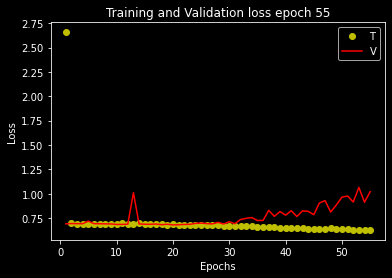

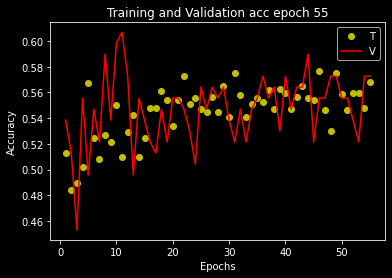

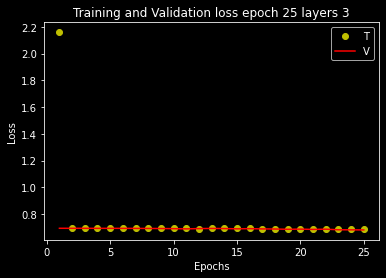

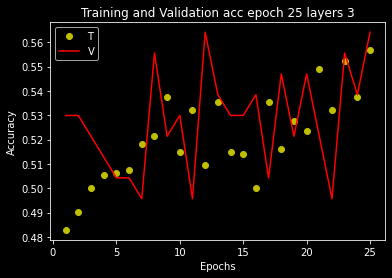

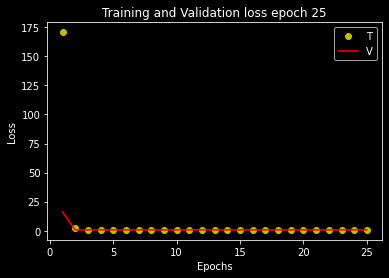

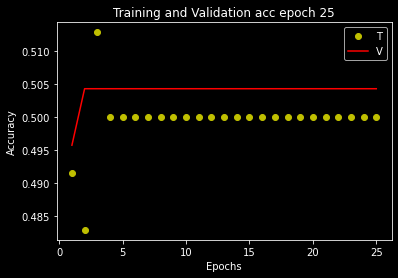

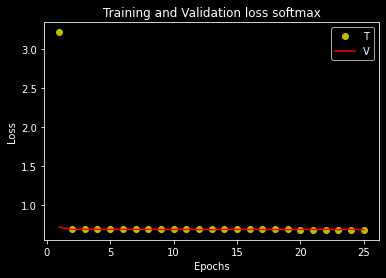

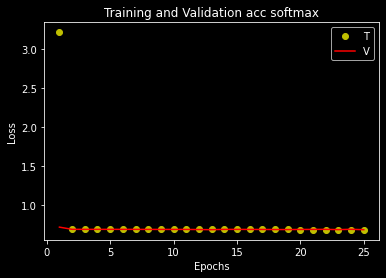

In [20]:
Main_title_loss="Training and Validation"
Main_title_acc = "Training and Validation"
draw_Training_validation_loss(history=history_ep_55,title=Main_title_loss+" loss epoch 55")
draw_Trainingvalidation_acc(history=history_ep_55,title=Main_title_acc+" acc epoch 55")


draw_Training_validation_loss(history=history_ep_25_layer_3,title=Main_title_loss+" loss epoch 25 layers 3")
draw_Trainingvalidation_acc(history=history_ep_25_layer_3,title=Main_title_acc+" acc epoch 25 layers 3")


draw_Training_validation_loss(history=history_ep_25,title=Main_title_loss+" loss epoch 25")
draw_Trainingvalidation_acc(history=history_ep_25,title=Main_title_acc+" acc epoch 25")

draw_Training_validation_loss(history=history_softmax,title=Main_title_loss+" loss softmax")
draw_Training_validation_loss(history=history_softmax,title=Main_title_loss+" acc softmax")


# testing the model with random data from test set

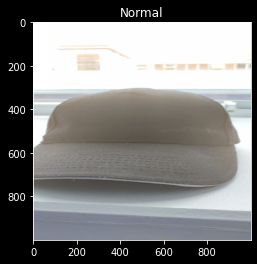

[[0.484165]]
normal


In [67]:
value = random.randint(0,len(Y_valid_data))
plt.imshow(X_valid_data[value,:])
#actuall what data is
if Y_valid_data[value,:] == 0:
    plt.title("Normal")
else:
    plt.title("stegged")
plt.show()


#model prediction
#prediction = model_softmax.predict(X_test_dataplt.legend("Training loss and validation loss"))
prediction = model_ep_55.predict(X_test_data[value,:].reshape(1,1000,1000,3))
#prediction_label = np.argmax(model_ep_25.predict(X_test_data[value,:].reshape(1,1000,1000,3)), axis=-1)
#print(prediction)
#print(prediction_label)

#prediction_1 = model_ep_25_layer_3.predict(X_test_data[value,:].reshape(1,1000,1000,3))
#print(prediction_1)

#prediction_2 = model_ep_55.predict(X_test_data[value,:].reshape(1,1000,1000,3))
#print(prediction_2)
#print(prediction*100,"%")
print(prediction)
prediction = prediction > 0.5

labels = ["normal","stegged"]
classs_labels = [labels[i] for i,prob in enumerate(prediction) if prob > 0.5]
#print(classs_labels)


if prediction == 0:
    prediction = 'normal'
else:
    prediction = 'stegged'

print(prediction)


In [ ]:
#score_25 = model_ep_25.evaluate(X_test_data,Y_test_data,verbose=0)
#score_55 = model_ep_55.evaluate(X_test_data,Y_test_data,verbose=0)
#score_25_layer_3 = model_ep_25_layer_3.evaluate(X_test_data,Y_test_data,verbose=0)
score_soft = model_softmax.evaluate(X_test_data,Y_test_data,verbose=0)
print('Model 25 ep')
print('Test loss:',score_soft[0])
print('Test acc',score_soft[1])

#print('Model 55 ep')
#print('Test loss:',score_55[0])
#print('Test acc',score_55[1])

#print('Model 25 ep layers 3')
#print('Test loss:',score_25_layer_3[0])
#print('Test acc',score_25_layer_3[1])

In [ ]:
print(model_ep_25.metrics_names)

# testing output (prediction)

In [ ]:
probability_model = Sequential([model_ep_25,Softmax()])
value = random.randint(0,len(Y_test_data))


#prediction = model_ep_25.predict(X_test_data[value,:].reshape(1,1000,1000,3))

prediction_test = probability_model.predict(X_test_data[value,:].reshape(1,1000,1000,3))



In [ ]:
print(prediction_test[0])
np.argmax(prediction_test[0])